# Decision Trees

Last updated date - 26-June-2022

Previous version code file- [click here ](https://colab.research.google.com/drive/1lCqB8A5VLsxq9HUyzpSBHrEFwtemT69T)

# Entropy

In [1]:
#p1=0.5 and p2=0.5 
import math
entropy=-0.5*math.log2(0.5) -0.5*math.log2(0.5)
print("Entropy for 50%-50% case ==>", entropy)

Entropy for 50%-50% case ==> 1.0


In [11]:
entropy=-0.0001*math.log2(0.0001) -0.9999*math.log2(0.9999)
print("Entropy for 0%-100% case ==>", entropy)

Entropy for 0%-100% case ==> 0.0014730335283281598


In [10]:
import math
entropy=-0.45*math.log2(0.45) -0.55*math.log2(0.55)
print("Entropy for 45%-55% case ==>", entropy)

entropy=-0.05*math.log2(0.05) -0.95*math.log2(0.95)
print("Entropy for 5%-95% case ==>", entropy)

Entropy for 45%-55% case ==> 0.9927744539878083
Entropy for 5%-95% case ==> 0.28639695711595625


# Data Importing

In [2]:
#Import Data
import pandas as pd

Ecom_data = pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Ecom_Cust_Relationship_Management/Ecom_Cust_Survey_v1.csv")

Ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11805 entries, 0 to 11804
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cust_num              11805 non-null  int64 
 1   Region                11805 non-null  int64 
 2   Age                   11805 non-null  int64 
 3   Order_Quantity        11805 non-null  int64 
 4   Customer_Type         11805 non-null  object
 5   Overall_Satisfaction  11805 non-null  object
dtypes: int64(4), object(2)
memory usage: 553.5+ KB


In [9]:
Ecom_data['Overall_Satisfaction'].value_counts()

Dis Satisfied    6408
Satisfied        5397
Name: Overall_Satisfaction, dtype: int64

# Convert Non-numerical Data into numerical

In [4]:
Ecom_data['Customer_Type_num'] = Ecom_data['Customer_Type'].map({'Prime': 1, 'Non_Prime': 0}).astype(int)
print(Ecom_data['Customer_Type'].value_counts())
print(Ecom_data['Customer_Type_num'].value_counts())

Prime        6804
Non_Prime    5001
Name: Customer_Type, dtype: int64
1    6804
0    5001
Name: Customer_Type_num, dtype: int64


In [5]:
Ecom_data['Overall_Satisfaction_num'] = Ecom_data['Overall_Satisfaction'].map( {'Dis Satisfied': 0, 'Satisfied': 1} ).astype(int).astype(int)
print(Ecom_data['Overall_Satisfaction'].value_counts())
print(Ecom_data['Overall_Satisfaction_num'].value_counts())

Dis Satisfied    6408
Satisfied        5397
Name: Overall_Satisfaction, dtype: int64
0    6408
1    5397
Name: Overall_Satisfaction_num, dtype: int64


In [6]:
Ecom_data.columns

Index(['Cust_num', 'Region', 'Age', 'Order_Quantity', 'Customer_Type',
       'Overall_Satisfaction', 'Customer_Type_num',
       'Overall_Satisfaction_num'],
      dtype='object')

# Decision Tree Model Building

In [7]:
from sklearn import tree

features= ['Region', 'Age', 'Order_Quantity',  'Customer_Type_num']
print("Features",features)

X = Ecom_data[features]
print("X shape", X.shape)
y = Ecom_data['Overall_Satisfaction']
print("Y shape", y.shape)

Features ['Region', 'Age', 'Order_Quantity', 'Customer_Type_num']
X shape (11805, 4)
Y shape (11805,)


|--- Order_Quantity <= 40.50
|   |--- Age <= 29.50
|   |   |--- class: Satisfied
|   |--- Age >  29.50
|   |   |--- class: Dis Satisfied
|--- Order_Quantity >  40.50
|   |--- Age <= 20.50
|   |   |--- class: Satisfied
|   |--- Age >  20.50
|   |   |--- class: Satisfied



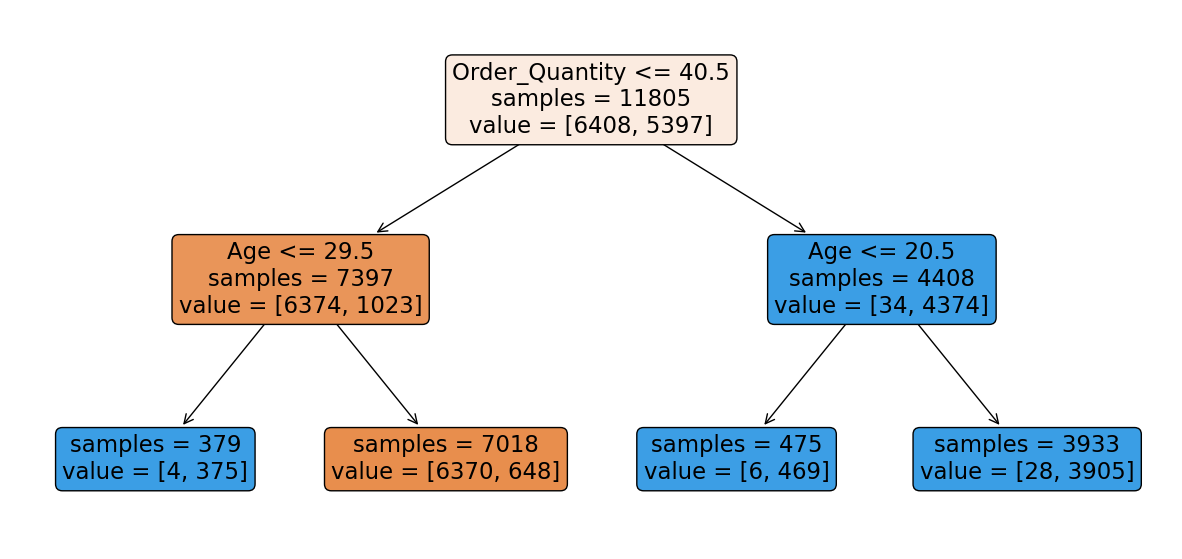

In [13]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=2)
DTree.fit(X,y)

##Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

# Tree Validation

In [18]:
##########Tree Validation
#Tree Validation
predict1 = DTree.predict(X)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y, predict1)
print (cm)

total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[6370   38]
 [ 648 4749]]
0.9418890300720034


# The problem of overfitting

In [19]:
#Datasets: Diabetes
#Import both test and training data

train = pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/pima/diabetes_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/pima/diabetes_test.csv")

print(train.sample(5))

     Count_Pregnancies  Glucose_level  BP  SkinThickness_index  Insulin_level  \
288                  9            124  70                   33            402   
147                  3            107  62                   13             48   
289                  1             96  64                   27             87   
377                  8            183  64                    0              0   
310                  0            107  62                   30             74   

      BMI  DiabetesPedigreeFunction  Age  Diabetes_outcome  
288  35.4                     0.282   34                 0  
147  22.9                     0.678   23                 1  
289  33.2                     0.289   21                 0  
377  23.3                     0.672   32                 1  
310  36.6                     0.757   25                 1  


In [20]:
from sklearn import tree

#Defining Features and lables
features=['Count_Pregnancies', 'Glucose_level', 'BP', 'SkinThickness_index', 
          'Insulin_level', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X_train = train[features]
y_train = train['Diabetes_outcome']

#X_train

X_test = test[features]
y_test = test['Diabetes_outcome']

In [21]:
#training Tree Model
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Train Accuracy 1.0
Test Accuracy 0.7727272727272727


# Pruning

## max_leaf_nodes - Finetuning

In [44]:
#training Tree Model
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 17)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Train Accuracy 0.8338762214983714
Test Accuracy 0.8116883116883117
